<a href="https://colab.research.google.com/github/AmmariHiba/NLP/blob/main/IndividualAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset Preparation


In [ ]:
#impot necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.tokenize import word_tokenize
import spacy

In [ ]:
#spacy for smooth lematization , tokenization
!pip install spacy
!python -m spacy download en_core_web_sm
!python -m spacy download fr_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 94.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 95.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
#read the tsv file
ds = pd.read_csv('/content/Sentence pairs in English-French - 2026-02-11.tsv', sep='\t', header=None) #change path if needed

In [ ]:
ds.columns = ['english_index', 'english_sentence', 'french_index', 'french_sentence']
ds = ds[['english_sentence', 'french_sentence']] #keep necessary columns only

In [ ]:
ds = ds.drop_duplicates()
ds = ds.dropna() #drop duplicates and null

In [ ]:
len(ds)

176917

In [ ]:
nlp_en = spacy.load("en_core_web_sm", disable=["parser", "ner", "textcat"]) # load  spacy english corpus
nlp_fr = spacy.load("fr_core_news_sm", disable=["parser", "ner", "textcat"]) # load spacy french corpus

In [ ]:
# tokenizing, lematizing
def clean_batch(texts, nlp):
    cleaned = []
    for doc in nlp.pipe(texts, batch_size=1000):
        tokens = [token.lemma_ for token in doc if token.is_alpha]
        cleaned.append(tokens)
    return cleaned

In [ ]:
ds['en_tokens'] = clean_batch(ds['english_sentence'], nlp_en)
ds['fr_tokens'] = clean_batch(ds['french_sentence'], nlp_fr)

In [ ]:
english_corpus = ds['en_tokens'].tolist()
french_corpus = ds['fr_tokens'].tolist()

In [ ]:
french_corpus[:25]

[['essayon', 'quelque', 'chose'],
 ['tenton', 'quelque', 'chose'],
 ['je', 'devoir', 'aller', 'dormir'],
 ['nous', 'être', 'le', 'juin', 'et', 'être', 'anniversaire', 'de', 'Muiriel'],
 ['être', 'le', 'juin', 'et', 'être', 'anniversaire', 'de', 'Muiriel'],
 ['Muiriel', 'avoir', 'an', 'maintenant'],
 ['le', 'mot', 'de', 'passer', 'être', 'Muiriel'],
 ['je', 'être', 'bientôt', 'de', 'retour'],
 ['je', 'être', 'de', 'retour', 'dans', 'un', 'minute'],
 ['je', 'revenir', 'tout', 'de', 'suite'],
 ['je', 'revenir', 'vite'],
 ['je', 'revenir', 'de', 'suite'],
 ['en', 'perdre', 'mon', 'mot'],
 ['le', 'mot', 'me', 'manquer'],
 ['je', 'ne', 'trouver', 'pas', 'le', 'mot'],
 ['Ça', 'ne', 'aller', 'jamais', 'finir'],
 ['cela', 'en', 'finira', 'jamais'],
 ['je', 'ne', 'savoir', 'simplement', 'pas', 'quoi', 'dire'],
 ['je', 'ne', 'savoir', 'pas', 'quoi', 'dire', 'tout', 'simplement'],
 ['être', 'un', 'méchant', 'lapin'],
 ['être', 'dans', 'le', 'montagne'],
 ['est', 'que', 'être', 'un', 'photo', 'réce

#Embeddings

##1HotEncoding

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_en = CountVectorizer(binary=True)
X_en_onehot = count_en.fit_transform(ds['english_sentence'])
count_fr = CountVectorizer(binary=True)
X_fr_onehot = count_fr.fit_transform(ds['french_sentence'])

##TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_en = TfidfVectorizer()
X_en_tfidf = tfidf_en.fit_transform(ds['english_sentence'])

tfidf_fr = TfidfVectorizer()
X_fr_tfidf = tfidf_fr.fit_transform(ds['french_sentence'])

##Word2Vec

In [ ]:
pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 76.0 MB/s eta 0:00:00


In [ ]:
from gensim.models import Word2Vec


w2v_en = Word2Vec(
    sentences=english_corpus,
    vector_size=100, #100d vector
    window=5,  #taking 5 context words into consideration
    min_count=2,
    workers=4
)

In [ ]:
w2v_fr = Word2Vec(
    sentences=french_corpus,
    vector_size=100,
    window=5,
    min_count=2,
    workers=4
) #same for french sentences

In [ ]:
w2v_en.wv.most_similar("sleep")


[('stay', 0.6713301539421082),
 ('dance', 0.6617928743362427),
 ('travel', 0.6511587500572205),
 ('bed', 0.6457365155220032),
 ('arrive', 0.6388303637504578),
 ('move', 0.6324471831321716),
 ('swim', 0.6200524568557739),
 ('walk', 0.6140912771224976),
 ('leave', 0.5899437665939331),
 ('fight', 0.5885408520698547)]

In [ ]:
w2v_fr.wv.most_similar("manger")


[('boire', 0.7240236401557922),
 ('travailler', 0.6247435808181763),
 ('attendre', 0.610954225063324),
 ('prendre', 0.6060383319854736),
 ('voir', 0.5977715253829956),
 ('faire', 0.5893505811691284),
 ('reste', 0.5871856212615967),
 ('payer', 0.5791248679161072),
 ('consommer', 0.5707617402076721),
 ('dormir', 0.5657686591148376)]

##FastText

In [ ]:
from gensim.models import FastText

ft_en = FastText(
    sentences=english_corpus,
    vector_size=100,
    window=5,
    min_count=2
)

ft_fr = FastText(
    sentences=french_corpus,
    vector_size=100,
    window=5,
    min_count=2
)


In [ ]:
ft_en.wv.most_similar("sleep")

[('sleepy', 0.9213644862174988),
 ('asleep', 0.8917525410652161),
 ('sleeper', 0.877496600151062),
 ('sleeve', 0.8540728688240051),
 ('Sheep', 0.8424328565597534),
 ('steep', 0.8352492451667786),
 ('sleeping', 0.8343714475631714),
 ('peep', 0.8223297595977783),
 ('sweep', 0.8188767433166504),
 ('sleepless', 0.7900694608688354)]

In [ ]:
ft_en.wv["ubermench"] #generating a vector for an unseen word "ubermench"

array([-0.3760227 , -0.07571375,  0.18446687, -0.06665046,  0.22088678,
       -0.5203267 ,  0.1928698 ,  0.04151962,  0.09353685, -0.57035637,
        0.4294836 , -0.07305242, -0.6027757 , -0.22348687,  0.35321912,
       -0.01860378, -0.3674918 ,  0.2491141 , -0.26470837,  0.22711521,
        0.2988127 ,  0.3358582 , -0.06639151,  0.02476153,  0.36925298,
        0.09558708,  0.15228057, -0.26280382,  0.159387  , -0.35566404,
       -0.27153197,  0.40127307, -0.12177098,  0.21509504, -0.5677551 ,
       -0.00589265, -0.016492  , -0.13545229,  0.33349356,  0.3037209 ,
       -0.06257091,  0.00466224, -0.22946708, -0.15220283,  0.02350974,
        0.12858742,  0.13223036, -0.34635314,  0.02930071,  0.19457835,
       -0.37848672,  0.02627398,  0.24167119,  0.06269505, -0.15437838,
        0.02299967,  0.05617312, -0.0228846 ,  0.19189332,  0.18735266,
        0.0454194 , -0.215679  ,  0.07422464,  0.13463742,  0.22134088,
        0.12381188,  0.316738  , -0.15391466,  0.13264681,  0.01

##GloVe

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec

#adding header, gensim expects a header
glove_input_file = "/content/wiki_giga_2024_100_MFT20_vectors_seed_2024_alpha_0.75_eta_0.05.050_combined.txt"
word2vec_output_file = "/content/glove.100d.w2v.txt"

glove2word2vec(glove_input_file, word2vec_output_file)

print("Conversion Done!")


/tmp/ipython-input-2399544739.py:7: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)


Conversion Done!


In [ ]:
from gensim.models import KeyedVectors

glove_en = KeyedVectors.load_word2vec_format(
    "glove.100d.w2v.txt",
    binary=False
)

print("Loaded successfully!")


Loaded successfully!


In [ ]:
print(glove_en["computer"].shape) # 100d vectors

(100,)


In [ ]:
print(glove_en.most_similar("water", topn=5))

[('natural', 0.7529725432395935), ('dry', 0.7384373545646667), ('clean', 0.7222684025764465), ('drain', 0.7153087258338928), ('sea', 0.7114924192428589)]


In [ ]:
print(len(glove_en.key_to_index))

163675


#Multilingual Alignment

In [ ]:
#import Muse en-fr dictionary
!wget https://dl.fbaipublicfiles.com/arrival/dictionaries/en-fr.txt

--2026-02-13 21:04:58--  https://dl.fbaipublicfiles.com/arrival/dictionaries/en-fr.txt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.171.22.13, 3.171.22.33, 3.171.22.68, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.171.22.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1857759 (1.8M) [text/x-c++]
Saving to: ‘en-fr.txt’

en-fr.txt           100%[===================>]   1.77M  6.46MB/s    in 0.3s    

2026-02-13 21:04:59 (6.46 MB/s) - ‘en-fr.txt’ saved [1857759/1857759]



In [ ]:
#load dictionary
def load_dictionary(path):
    pairs = []
    with open(path, 'r', encoding='utf-8') as f:
        for line in f:
            en, fr = line.strip().split()
            pairs.append((en, fr))
    return pairs

muse_dict = load_dictionary("/content/en-fr.txt")

print("Total pairs in dictionary:", len(muse_dict))


Total pairs in dictionary: 113286


## using w2v embeddings

In [ ]:
filtered_pairs = [
    (en, fr)
    for en, fr in muse_dict
    if en in w2v_en.wv and fr in w2v_fr.wv
]

print("Pairs usable for alignment:", len(filtered_pairs))


Pairs usable for alignment: 9177


In [ ]:
X = np.array([w2v_fr.wv[fr] for en, fr in filtered_pairs])
Y = np.array([w2v_en.wv[en] for en, fr in filtered_pairs])

print(X.shape)


(9177, 100)


In [ ]:
#normalization for better allignement
X = X / np.linalg.norm(X, axis=1, keepdims=True)
Y = Y / np.linalg.norm(Y, axis=1, keepdims=True)

In [ ]:
#compute procrustes
U, _, Vt = np.linalg.svd(X.T @ Y)
W = U @ Vt

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import random

sample_pairs = random.sample(filtered_pairs, 50)

for en_word, fr_word in sample_pairs:
    en_vec = w2v_en.wv[en_word]
    fr_vec = w2v_fr.wv[fr_word]
    fr_vec_aligned = fr_vec @ W

    sim = cosine_similarity(
        en_vec.reshape(1,-1),
        fr_vec_aligned.reshape(1,-1)
    )[0][0]

    print(f"{en_word}-{fr_word}: {sim:.4f}")


haunt-hanter: 0.8071
bakery-pâtisserie: 0.8232
move-bouger: 0.6004
garden-jardin: 0.9252
hope-espérance: 0.1296
lair-repaire: 0.5605
heart-cœur: 0.8490
headquarters-siège: 0.6878
enthusiastic-enthousiaste: 0.4337
chandelier-chandelier: 0.7623
promise-promettre: 0.6042
attractive-attirant: 0.8791
testing-test: 0.7101
timetable-horaire: 0.8020
perform-effectuer: 0.6329
mobile-portable: 0.8264
detect-détecter: 0.8693
disorder-trouble: 0.7759
draw-dessine: 0.5956
guise-guise: 0.4398
heavenly-céleste: 0.8562
finishing-terminer: -0.1097
bone-os: 0.8116
joy-joie: 0.8631
management-gestion: 0.8242
butter-beurre: 0.8167
purge-purge: 0.6543
off-hors: 0.2917
promising-prometteur: 0.8678
deception-déception: 0.8299
religion-religieux: 0.7568
hippy-hippie: 0.5091
marketing-marketing: 0.7343
privilege-privilège: 0.9220
bless-bénir: 0.8874
just-simplement: 0.4272
excellent-excellente: 0.6382
dictator-dictateur: 0.9001
reap-récolter: 0.8052
capture-capter: 0.6716
even-même: 0.4288
horrible-affreux: 0.

## using fasttext embeddings

In [ ]:
filtered_pairs_ft = [
    (en, fr)
    for en, fr in muse_dict
    if en in ft_en.wv.key_to_index
    and fr in ft_fr.wv.key_to_index
]


print("Pairs usable for alignment:", len(filtered_pairs_ft))

Pairs usable for alignment: 9177


In [ ]:
# Build matrices
X_ft = np.array([ft_fr.wv[fr] for en, fr in filtered_pairs_ft])
Y_ft = np.array([ft_en.wv[en] for en, fr in filtered_pairs_ft])

# Normalize
X_ft = X_ft / np.linalg.norm(X_ft, axis=1, keepdims=True)
Y_ft = Y_ft / np.linalg.norm(Y_ft, axis=1, keepdims=True)

# Compute Procrustes
U_ft, _, Vt_ft = np.linalg.svd(X_ft.T @ Y_ft)

W_ft = U_ft @ Vt_ft



In [ ]:
sample_pairs_ft = random.sample(filtered_pairs_ft, 500)
sims_before = []
sims_after  = []
for en_word, fr_word in sample_pairs_ft:

    en_vec = ft_en.wv[en_word]
    fr_vec = ft_fr.wv[fr_word]

    # normalize both
    en_vec = en_vec / np.linalg.norm(en_vec)
    fr_vec = fr_vec / np.linalg.norm(fr_vec)

     # BEFORE alignment
    sim_before = cosine_similarity(
        en_vec.reshape(1,-1),
        fr_vec.reshape(1,-1)
    )[0][0]

    # AFTER alignment
    fr_vec_aligned = fr_vec @ W_ft

    sim_after = cosine_similarity(
        en_vec.reshape(1,-1),
        fr_vec_aligned.reshape(1,-1)
    )[0][0]

    sims_before.append(sim_before)
    sims_after.append(sim_after)

#Analysis

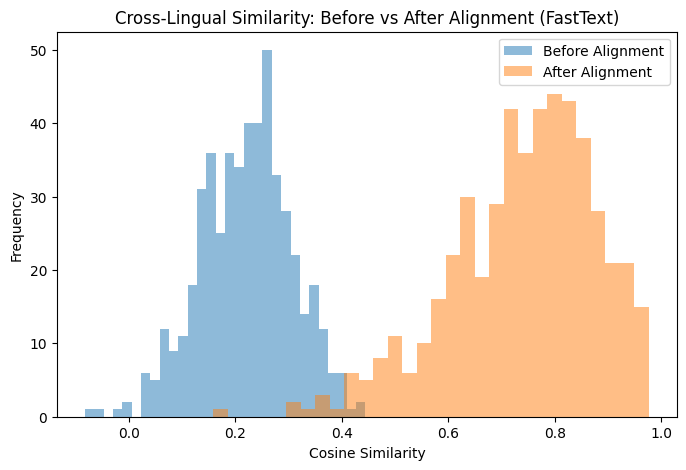

In [ ]:
#random 500 pairs cosine similarity before and after allignement
plt.figure(figsize=(8,5))
plt.hist(sims_before, bins=30, alpha=0.5, label="Before Alignment")
plt.hist(sims_after, bins=30, alpha=0.5, label="After Alignment")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.title("Cross-Lingual Similarity: Before vs After Alignment (FastText)")
plt.legend()
plt.show()

In [ ]:
#defining some words for analysis
words = [
    "king", "queen", "man", "woman", "boy", "girl",
    "good", "bad", "happy", "sad", "cheap", "expensive",
    "bank", "river", "money"
]

In [ ]:
def get_vectors(model, words, model_type="gensim"):
    """
    Extract valid word vectors from different embedding models.

    Parameters:
    model: embedding model (Word2Vec, FastText...)
    words: list of words
    model_type: "gensim" (Word2Vec/FastText) or "keyed" (GloVe)
    """

    valid_words = []
    vectors = []

    for w in words:
        try:
            if model_type == "gensim":
                if w in model.wv.key_to_index:
                    valid_words.append(w)
                    vectors.append(model.wv[w])
            elif model_type == "keyed":
                if w in model.key_to_index:
                    valid_words.append(w)
                    vectors.append(model[w])
        except KeyError:
            continue

    return valid_words, np.array(vectors)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot_pca(words, vectors, title="PCA Visualization"):
    """
    words: list of valid words
    vectors: numpy array of word vectors
    """

    if len(words) < 2:
        print("Not enough words to plot.")
        return

    pca = PCA(n_components=2)
    reduced = pca.fit_transform(vectors)

    plt.figure(figsize=(8,6))
    plt.scatter(reduced[:, 0], reduced[:, 1])

    for i, word in enumerate(words):
        plt.annotate(word, (reduced[i, 0], reduced[i, 1]))

    plt.title(title)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True)
    plt.show()


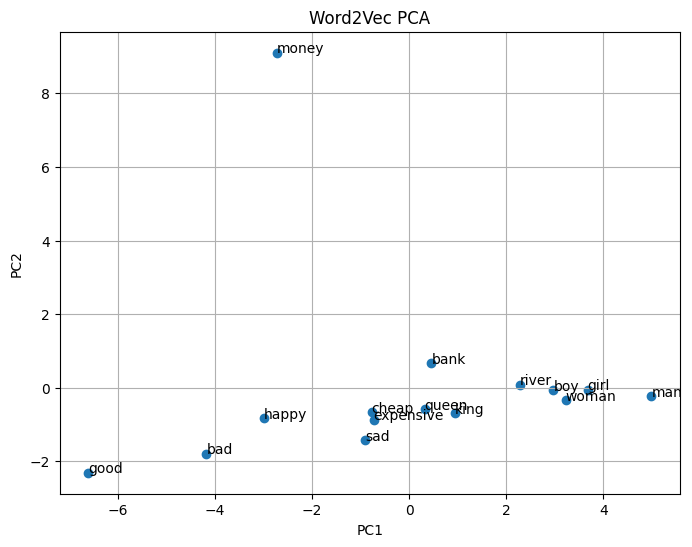

In [ ]:
words_w2v, vectors_w2v = get_vectors(w2v_en, words, model_type="gensim") #word2vec
plot_pca(words_w2v, vectors_w2v, "Word2Vec PCA")

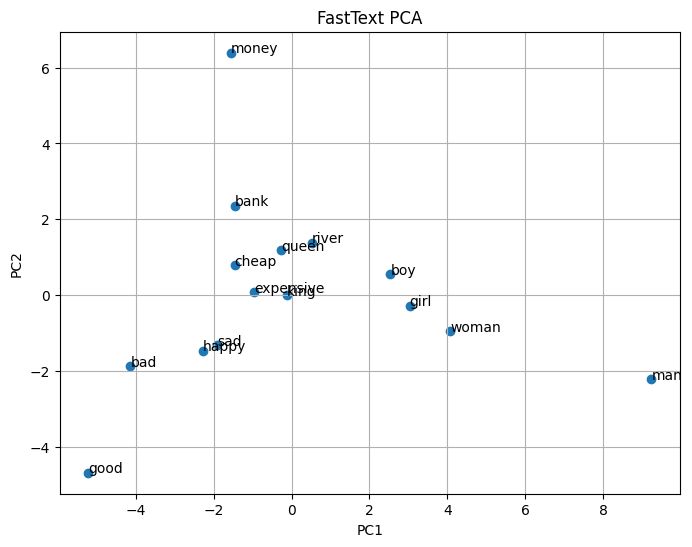

In [ ]:
words_ft, vectors_ft = get_vectors(ft_en, words, model_type="gensim") #fast
plot_pca(words_ft, vectors_ft, "FastText PCA")


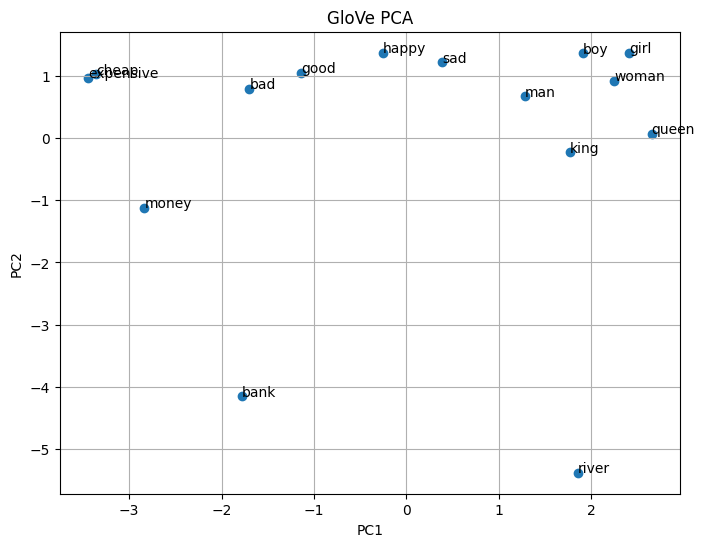

In [ ]:
words_glove, vectors_glove = get_vectors(glove_en, words, model_type="keyed") #gloVe
plot_pca(words_glove, vectors_glove, "GloVe PCA")


In [ ]:
def similarity(model, word1, word2):
    try:
        if hasattr(model, "wv"):
            vec1 = model.wv[word1]
            vec2 = model.wv[word2]
        else:
            vec1 = model[word1]
            vec2 = model[word2]
        return cosine_similarity(vec1.reshape(1,-1), vec2.reshape(1,-1))[0][0]
    except KeyError:
        return None
def pairwise_similarity_table(model, pairs):
    results = []
    for w1, w2 in pairs:
        sim = similarity(model, w1, w2)
        if sim is not None:
            results.append((w1, w2, round(sim, 3)))
    return results
## test with Synonyms and Antonyms similarity
pairs = [("good","happy"), ("good","bad"), ("king","queen"), ("bank","money"), ("bank","river")]

print("Word2Vec Similarities:")
print(pairwise_similarity_table(w2v_en, pairs))

print("FastText Similarities:")
print(pairwise_similarity_table(ft_en, pairs))

print("GloVe Similarities:")
print(pairwise_similarity_table(glove_en, pairs))

Word2Vec Similarities:
[('good', 'happy', np.float32(0.462)), ('good', 'bad', np.float32(0.704)), ('king', 'queen', np.float32(0.769)), ('bank', 'money', np.float32(0.357)), ('bank', 'river', np.float32(0.583))]
FastText Similarities:
[('good', 'happy', np.float32(0.559)), ('good', 'bad', np.float32(0.718)), ('king', 'queen', np.float32(0.656)), ('bank', 'money', np.float32(0.6)), ('bank', 'river', np.float32(0.684))]
GloVe Similarities:
[('good', 'happy', np.float32(0.824)), ('good', 'bad', np.float32(0.771)), ('king', 'queen', np.float32(0.755)), ('bank', 'money', np.float32(0.643)), ('bank', 'river', np.float32(0.412))]


In [ ]:
#neighbourhood analysis
def neighborhood(model, word, topn=10):
    try:
        if hasattr(model, "wv"):
            return model.wv.most_similar(word, topn=topn)
        else:
            return model.most_similar(word, topn=topn)
    except KeyError:
        return None
#test with bank
print("Top neighbors of 'bank' in Word2Vec:", neighborhood(w2v_en, "bank"))
print("Top neighbors of 'bank' in FastText:", neighborhood(ft_en, "bank"))
print("Top neighbors of 'bank' in GloVe:", neighborhood(glove_en, "bank"))


Top neighbors of 'bank' in Word2Vec: [('edge', 0.8097658753395081), ('cabin', 0.7764649391174316), ('boat', 0.7721059322357178), ('Richter', 0.7651454210281372), ('bridge', 0.7642618417739868), ('table', 0.7630996704101562), ('museum', 0.7563150525093079), ('shade', 0.7495693564414978), ('market', 0.7465309500694275), ('pond', 0.7441405653953552)]
Top neighbors of 'bank' in FastText: [('flank', 0.919921875), ('banquet', 0.9090644717216492), ('blank', 0.9067113399505615), ('rank', 0.8996120095252991), ('bandit', 0.8988066911697388), ('banker', 0.8984227776527405), ('racket', 0.8967342376708984), ('banner', 0.896285891532898), ('basket', 0.894438624382019), ('blanket', 0.893811821937561)]
Top neighbors of 'bank' in GloVe: [('banks', 0.850243330001831), ('banking', 0.7899232506752014), ('financial', 0.7486073970794678), ('credit', 0.724101185798645), ('investment', 0.720777153968811), ('exchange', 0.710588812828064), ('lending', 0.7079488635063171), ('treasury', 0.706728994846344), ('fund

In [ ]:
# OOV Check
def check_oov(model, word):
    if hasattr(model, "wv"):
        return word in model.wv.key_to_index
    else:
        return word in model.key_to_index
# 4. OOV example
oov_word = "ubermench"
print("Word2Vec OOV:", check_oov(w2v_en, oov_word))
print("FastText OOV:", check_oov(ft_en, oov_word), "Vector exists:", oov_word in ft_en.wv)

Word2Vec OOV: False
FastText OOV: False Vector exists: True


In [ ]:
def cross_lingual_similarity(en_model, fr_model, en_word, fr_word, W=None):
    try:
        vec_en = en_model.wv[en_word] if hasattr(en_model, "wv") else en_model[en_word]
        vec_fr = fr_model.wv[fr_word] if hasattr(fr_model, "wv") else fr_model[fr_word]
        if W is not None:
            vec_fr = vec_fr @ W
        return cosine_similarity(vec_en.reshape(1,-1), vec_fr.reshape(1,-1))[0][0]
    except KeyError:
        return None


In [ ]:
print("woman-femme similarity:", cross_lingual_similarity(ft_en, ft_fr, "woman", "femme", W=W_ft))

woman-femme similarity: 0.8237002


## Language Identification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
def sentence_embedding(sentence, model):
    """
    Average of word embeddings in a sentence
    """
    words = sentence.lower().split()
    vecs = []
    for w in words:
        if hasattr(model, "wv") and w in model.wv.key_to_index:
            vecs.append(model.wv[w])
        elif hasattr(model, "key_to_index") and w in model.key_to_index:
            vecs.append(model[w])
    if len(vecs) == 0:
        return np.zeros(model.vector_size)  # fallback
    return np.mean(vecs, axis=0)


In [ ]:
# Example: using first N sentences for speed
N = 15000

english_sentences = ds['english_sentence'][:N].tolist()
french_sentences  = ds['french_sentence'][:N].tolist()

sentences = english_sentences + french_sentences
labels = [0]*len(english_sentences) + [1]*len(french_sentences)  # 0 = English, 1 = French


In [ ]:
X = []
for i, s in enumerate(sentences):
    if i < N:
        X.append(sentence_embedding(s, w2v_en))
    else:
        X.append(sentence_embedding(s, w2v_fr))
X = np.array(X)
y = np.array(labels)



In [ ]:
# Keep sentences aligned with embeddings for printing
X_train, X_test, y_train, y_test, sent_train, sent_test = train_test_split(
    X, y, sentences, test_size=0.2, random_state=22, stratify=y
)

In [ ]:
#Train Classifier
clf = LogisticRegression(max_iter=500)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [ ]:
#Evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["English", "French"]))


              precision    recall  f1-score   support

     English       1.00      0.99      0.99      3000
      French       0.99      1.00      0.99      3000

    accuracy                           0.99      6000
   macro avg       0.99      0.99      0.99      6000
weighted avg       0.99      0.99      0.99      6000



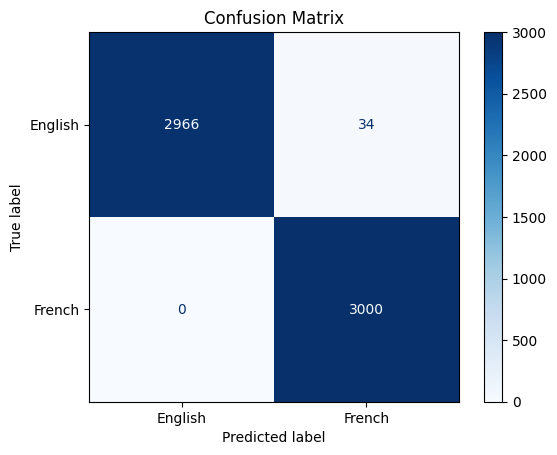

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create display
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["English", "French"])

# Plot
disp.plot(cmap="Blues")  # You can change colormap
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Print misclassified sentences

print("\nMisclassified sentences in the test set:")

for s, true, pred in zip(sent_test, y_test, y_pred):
    if true != pred:
        lang_true = "English" if true == 0 else "French"
        lang_pred = "English" if pred == 0 else "French"
        print(f"Sentence: {s}\nTrue: {lang_true}, Pred: {lang_pred}\n")



Misclassified sentences in the test set:
Sentence: Aoi dances.
True: English, Pred: French

Sentence: Congratulations!
True: English, Pred: French

Sentence: Peter loves Jane.
True: English, Pred: French

Sentence: Okay, let's go.
True: English, Pred: French

Sentence: Okay. Sorry.
True: English, Pred: French

Sentence: I'm exhausted.
True: English, Pred: French

Sentence: I'm exhausted.
True: English, Pred: French

Sentence: Betty killed her.
True: English, Pred: French

Sentence: Tom arrived last.
True: English, Pred: French

Sentence: Action!
True: English, Pred: French

Sentence: You've done it!
True: English, Pred: French

Sentence: What's biting you?
True: English, Pred: French

Sentence: I'm tired.
True: English, Pred: French

Sentence: It's late.
True: English, Pred: French

Sentence: I went into details.
True: English, Pred: French

Sentence: I'm sorry.
True: English, Pred: French

Sentence: You're sick!
True: English, Pred: French

Sentence: Tom frowned.
True: English, Pred: